# 2 Preliminary exploratory data analysis
### 2.1 Running Necessary Packages

In [2]:
library(tidyverse)
library(tidymodels) #general models
library(GGally) #ggpairs

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### 2.2 Reading and Tidying Data

In [3]:
options(scipen = 999)

genre_data = read_csv("https://raw.githubusercontent.com/paulh777/dsci100prj/main/proposal/data_by_genres.csv")

#Mutate categorical variables into factors
popularity_data = genre_data %>%
    mutate(mode=as_factor(mode))%>%
    mutate(key=as_factor(key))%>%
    mutate(genres=as_factor(genres))

#Table Preview
popularity_data %>% head(10) 

#Check for NA values
which(is.na(popularity_data))
#No NA rows found

Parsed with column specification:
cols(
  mode = col_double(),
  genres = col_character(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  loudness = col_double(),
  speechiness = col_double(),
  tempo = col_double(),
  valence = col_double(),
  popularity = col_double(),
  key = col_double()
)



mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,21st century classical,0.9793333,0.1628833,160297.7,0.07131667,0.606833670,0.36160000,-31.514333,0.04056667,75.3365,0.1037833,27.83333,6
1,432hz,0.4947800,0.2993333,1048887.3,0.45067833,0.477761667,0.13100000,-16.854000,0.07681667,120.2857,0.2217500,52.50000,5
1,8-bit,0.7620000,0.7120000,115177.0,0.81800000,0.876000000,0.12600000,-9.180000,0.04700000,133.4440,0.9750000,48.00000,7
1,[],0.6514170,0.5290926,232880.9,0.41914607,0.205309190,0.21869585,-12.288965,0.10787156,112.8574,0.5136043,20.85988,7
1,a cappella,0.6765573,0.5389612,190628.5,0.31643357,0.003003441,0.17225414,-12.479387,0.08285144,112.1104,0.4482487,45.82007,7
1,abstract,0.4592100,0.5161667,343196.5,0.44241667,0.849666667,0.11806667,-15.472083,0.04651667,127.8858,0.3073250,43.50000,1
1,abstract beats,0.3421467,0.6230000,229936.2,0.52780000,0.333602612,0.09965333,-7.918000,0.11637333,112.4138,0.4935067,58.93333,10
1,abstract hip hop,0.2438541,0.6945709,231849.2,0.64623464,0.024231263,0.16854292,-7.349328,0.21425770,108.2450,0.5713909,39.79070,2
0,accordeon,0.3230000,0.5880000,164000.0,0.39200000,0.441000000,0.07940000,-14.899000,0.07270000,109.1310,0.7090000,39.00000,2


integer(0)

### 2.3 Initial Split

In [16]:
#Initial Split
popularity_num = popularity_data%>%
    select(-key,-genres,-mode) #Removing categorical variables

popularity_split = initial_split(popularity_num, prop = 0.5, strata = popularity)
popularity_training = training(popularity_split)
popularity_testing = testing(popularity_split)

## 2.4 Exploratory Tables
### 2.4.1 Summary Table of Quantitative Variables

In [17]:
#Summary Table of Quantitative Variables

#Changing milliseconds to minutes to better fit the tables and visualiztion

popularity_num2 = popularity_training%>%
    mutate(duration_min = duration_ms/60000)%>%
    select(-duration_ms)

popularity_max = popularity_num2 %>%
    map_df(max, na.rm = TRUE)

popularity_min = popularity_num2 %>%
    map_df(min, na.rm = TRUE)

popularity_mean = popularity_num2 %>%
    map_df(mean, na.rm = TRUE)

popularity_median = popularity_num2 %>%
    map_df(median, na.rm = TRUE)

popularity_sd = popularity_num2 %>%
    map_df(sd, na.rm = TRUE)

    
popularity_max = popularity_max %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "variable",
        values_to = "max"
    )

popularity_min = popularity_min %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove1",
        values_to = "min"
    )

popularity_mean = popularity_mean %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove2",
        values_to = "mean"
    )

popularity_median = popularity_median %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove3",
        values_to = "median"
    )

popularity_sd = popularity_sd %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove4",
        values_to = "standard_deviation"
    )


popularity_table = popularity_max %>%
    bind_cols(popularity_min)%>%
    bind_cols(popularity_mean)%>%
    bind_cols(popularity_median)%>%
    bind_cols(popularity_sd)%>%
    select(variable,max,min,mean,median,standard_deviation)

popularity_table

variable,max,min,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
acousticness,0.9944000,0.00000271,0.40647022,0.33234051,0.32066616
danceability,0.9110000,0.05690000,0.53974616,0.54911218,0.15246961
energy,0.9890000,0.00100150,0.55695280,0.59887714,0.23563438
instrumentalness,0.9920000,0.00000000,0.20985512,0.07563736,0.26790925
liveness,0.7497000,0.02250000,0.19091356,0.17878495,0.08670042
loudness,-0.9100000,-41.82500000,-10.60276629,-9.30329133,5.44414781
speechiness,0.9462187,0.02580000,0.08547675,0.06090537,0.08277743
tempo,198.0750000,56.43600000,118.77052479,118.87982004,17.37888358
valence,0.9800000,0.01480000,0.49273744,0.50349492,0.20363661


## 2.5 Exploratory Visualizations
### 2.5.1 Key Barchart by Count and Mode

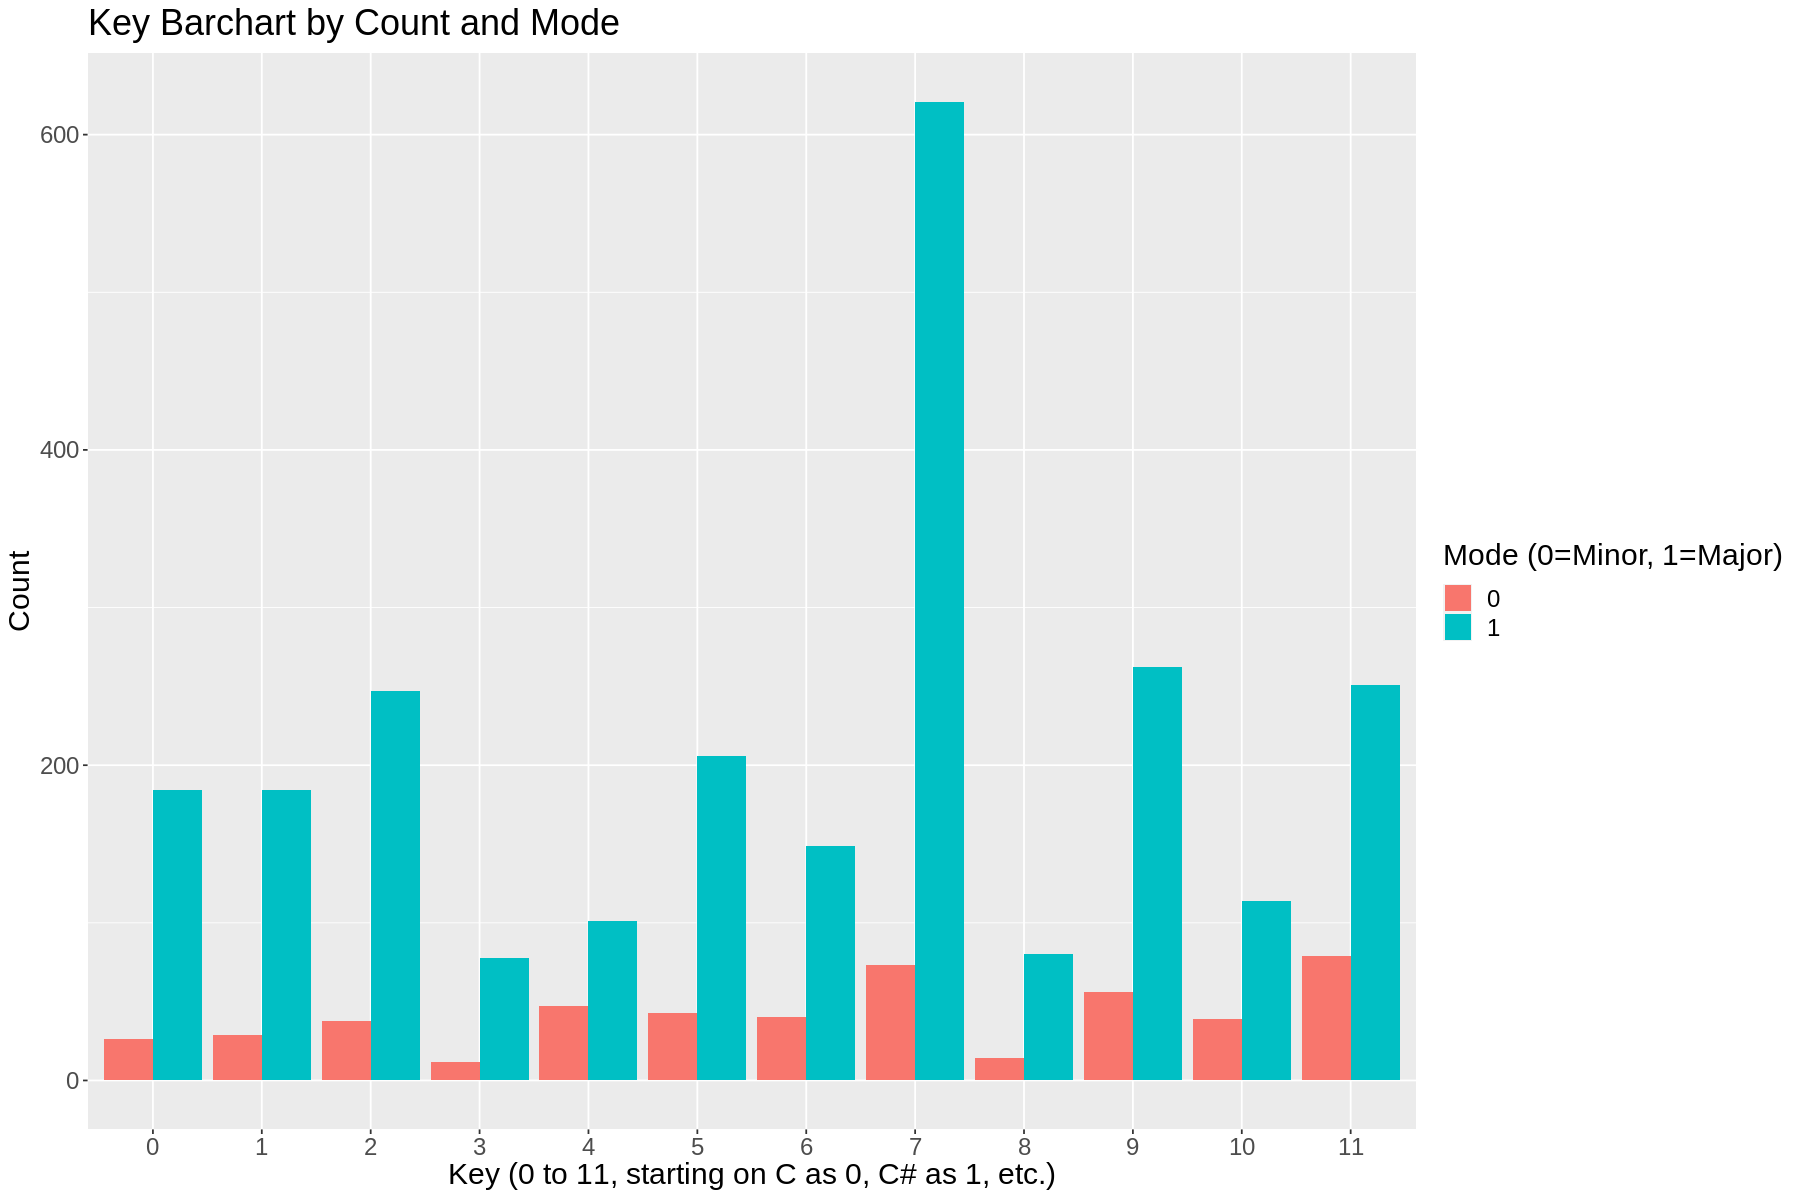

In [24]:
#Key Barchart by Count and Mode
popularity_cat = popularity_data%>%
    select(mode,key)

key_mode_plot = ggplot(popularity_cat, aes(x=key, fill=mode))+
    geom_bar(position="dodge") + 
    labs(
        x="Key (0 to 11, starting on C as 0, C# as 1, etc.)",
        y="Count", fill="Mode (0=Minor, 1=Major)",
        title="Key Barchart by Count and Mode") +
    theme(text = element_text(size = 18))

key_mode_plot

### 2.5.2 Quantitative Variables vs. Popularity Scatterplots

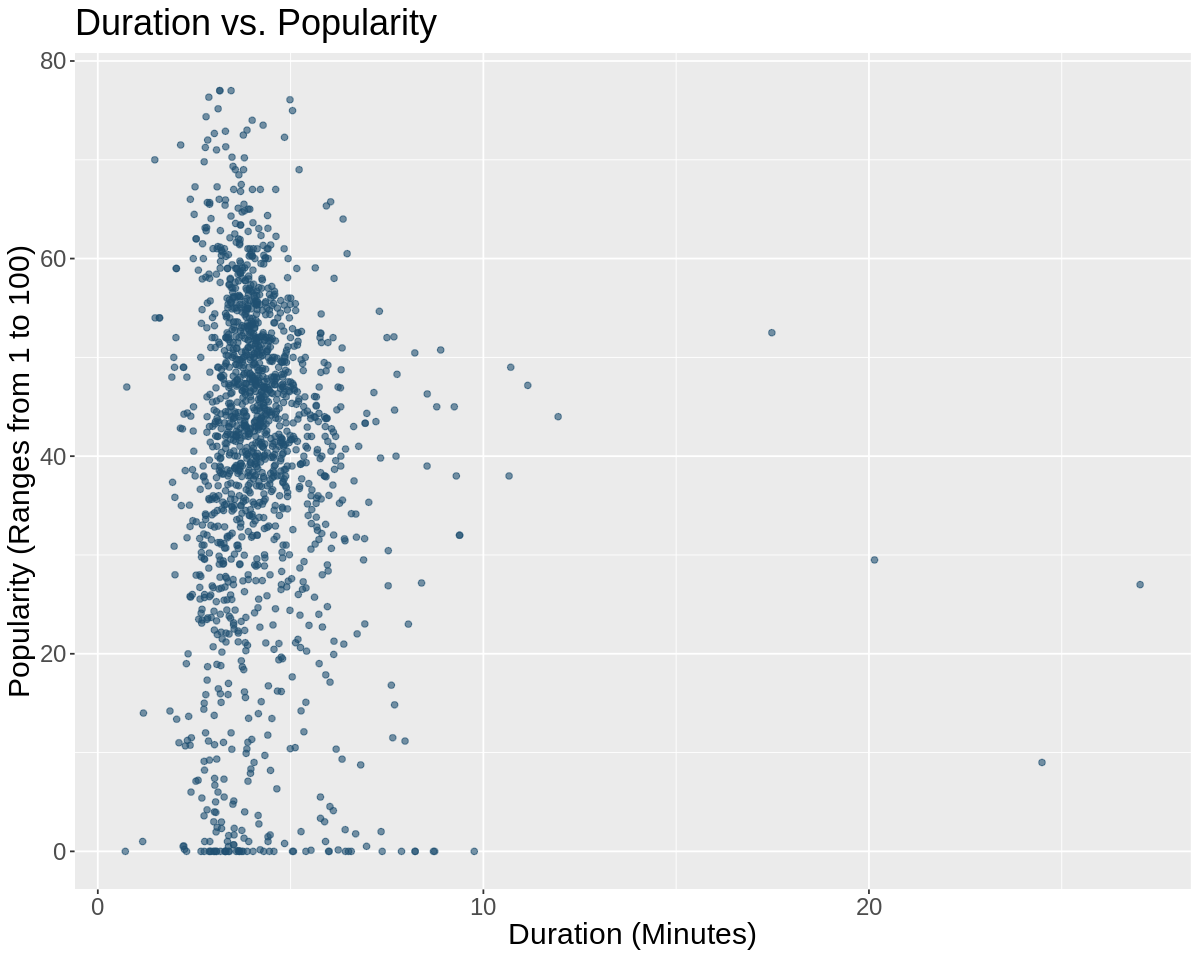

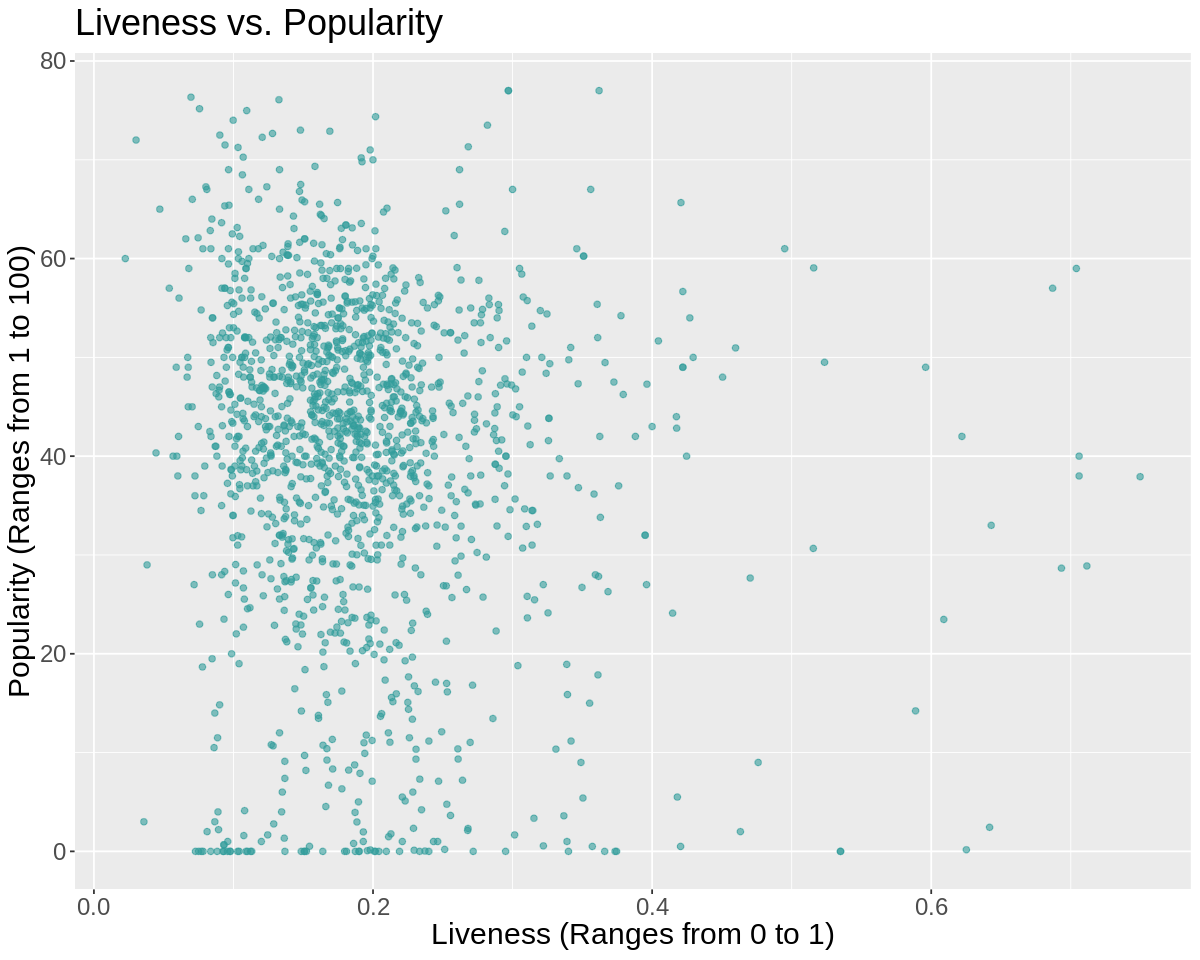

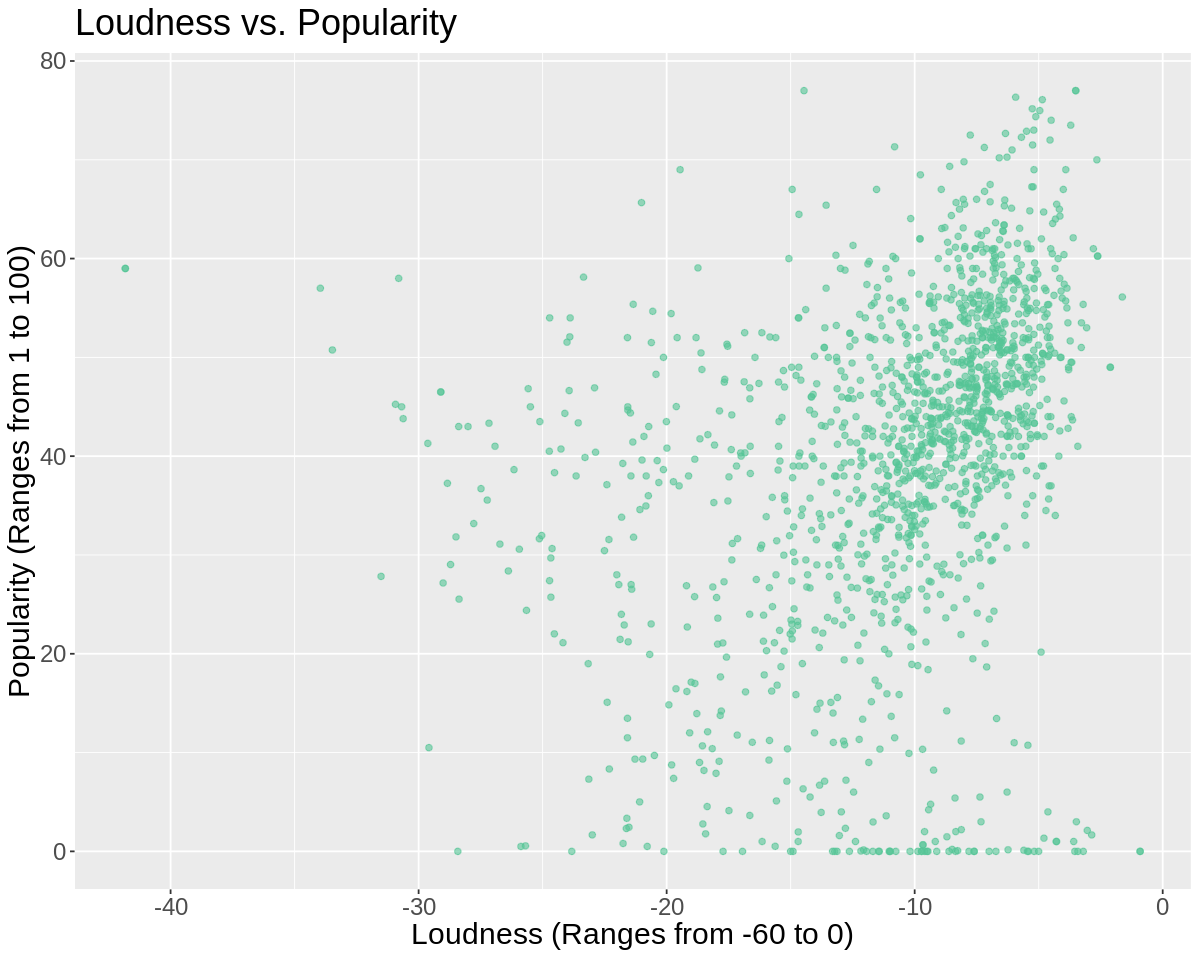

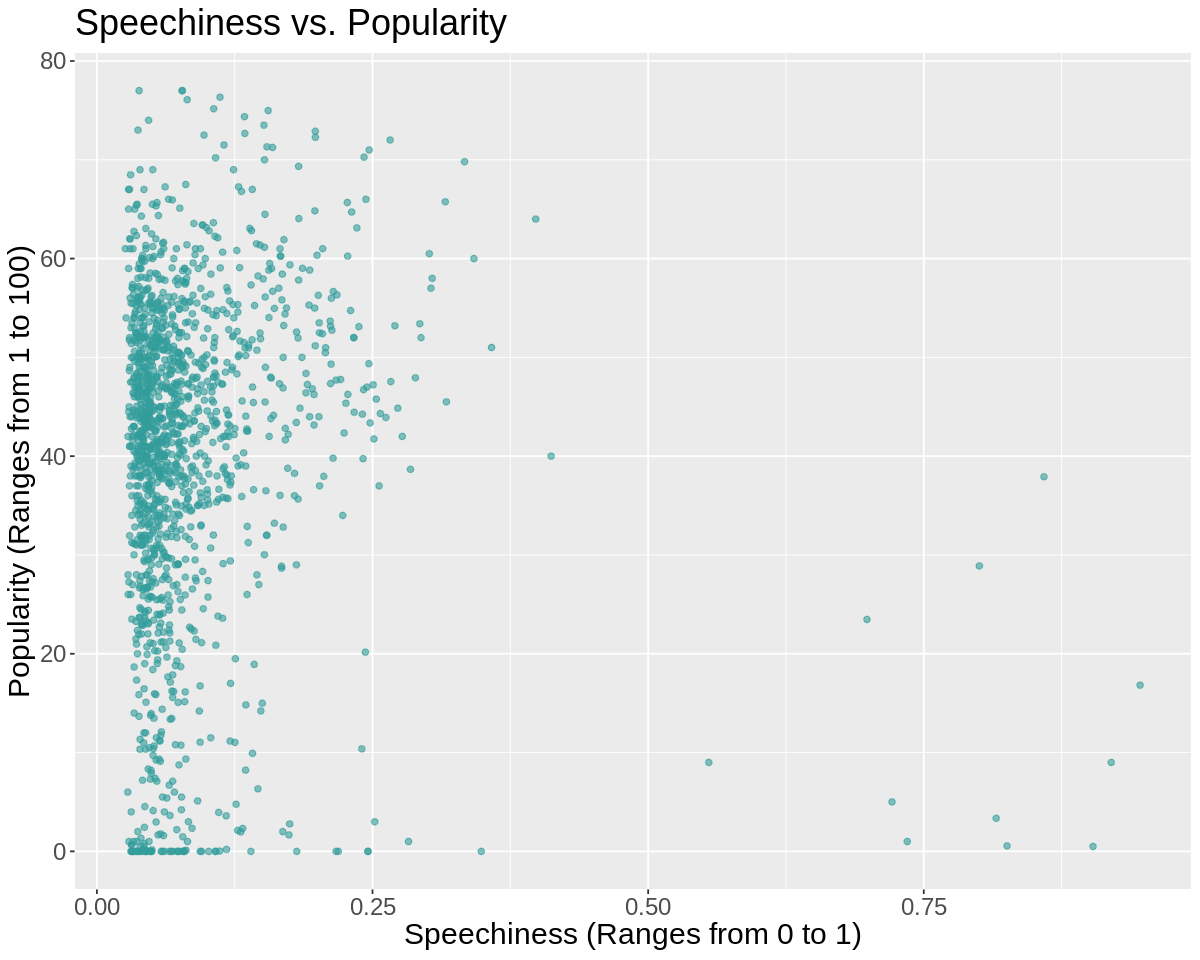

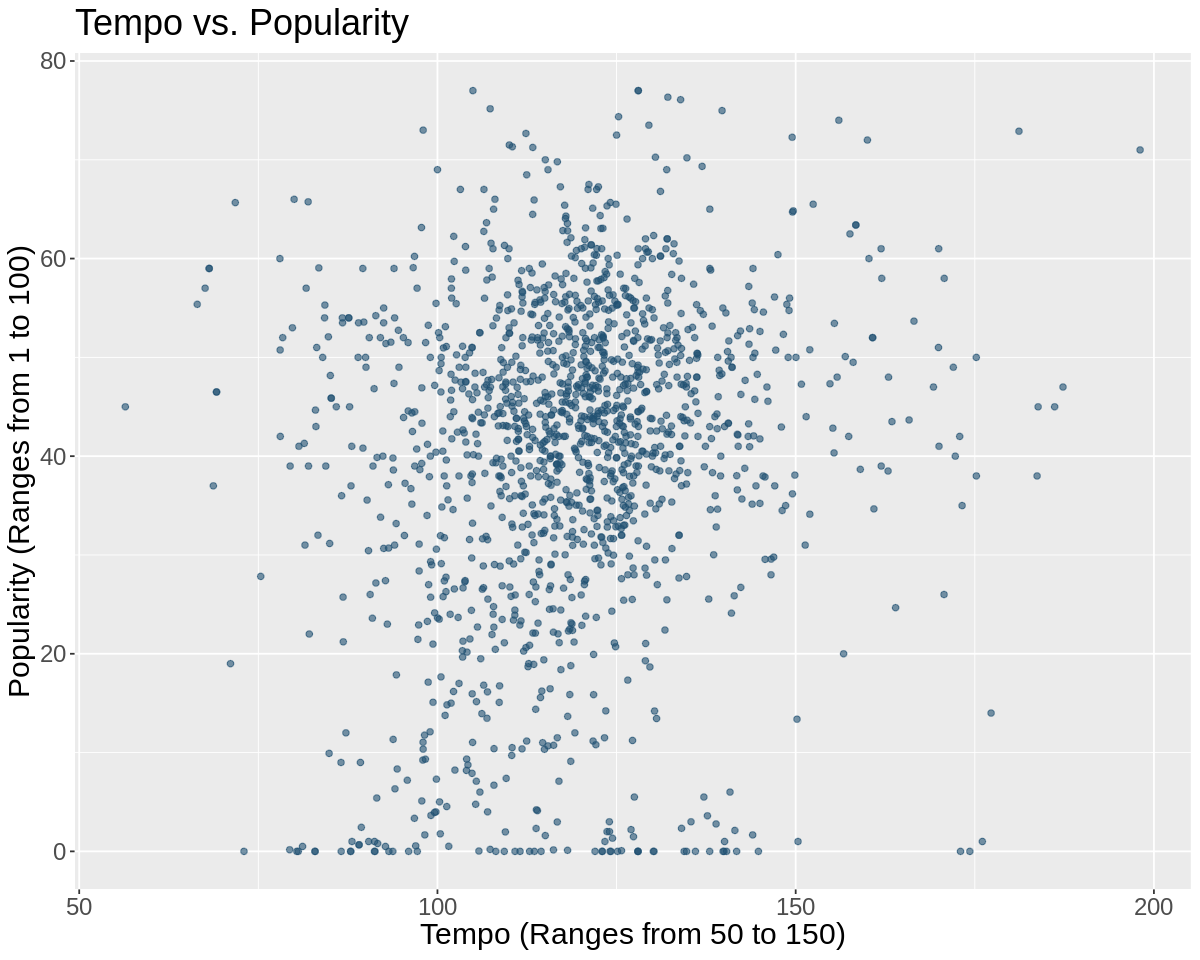

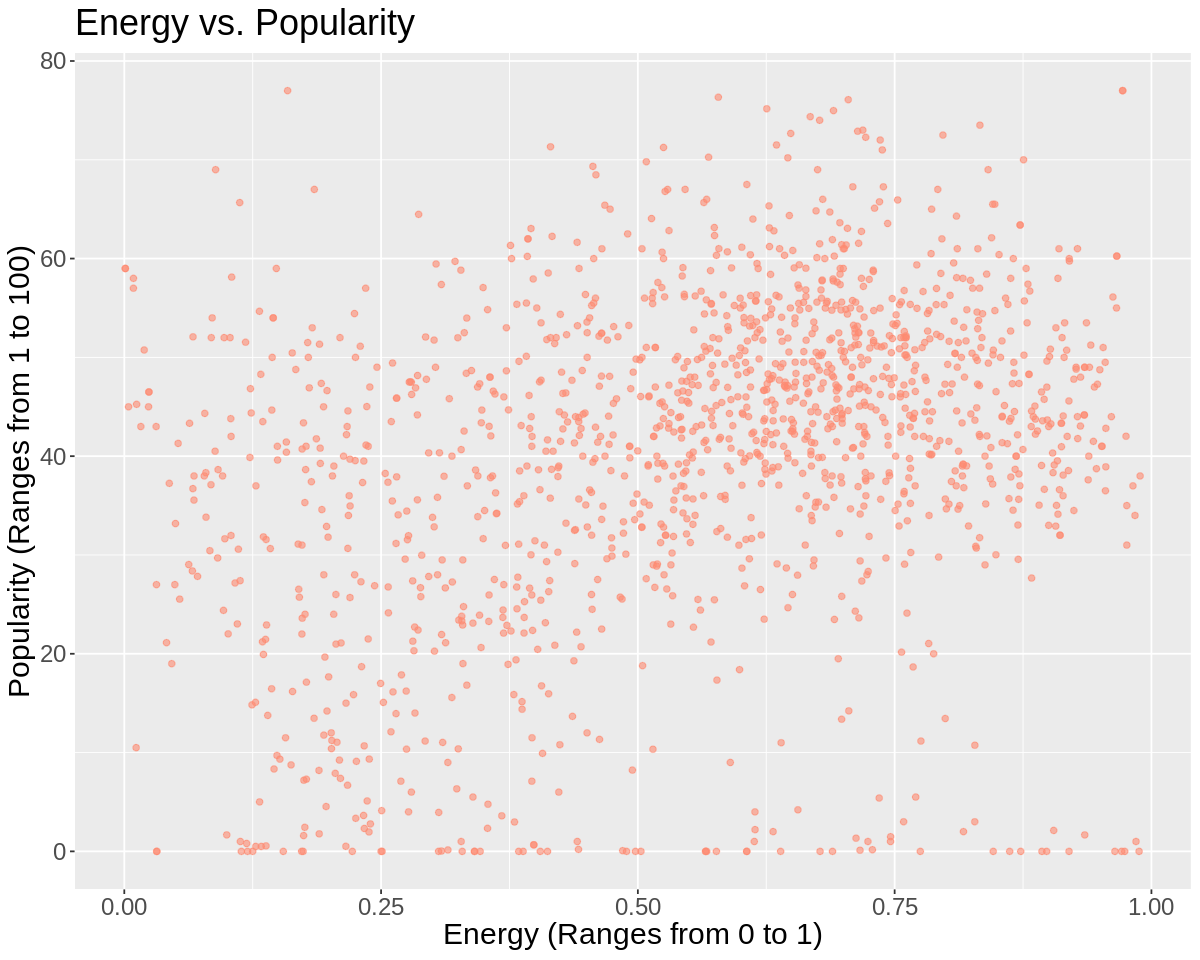

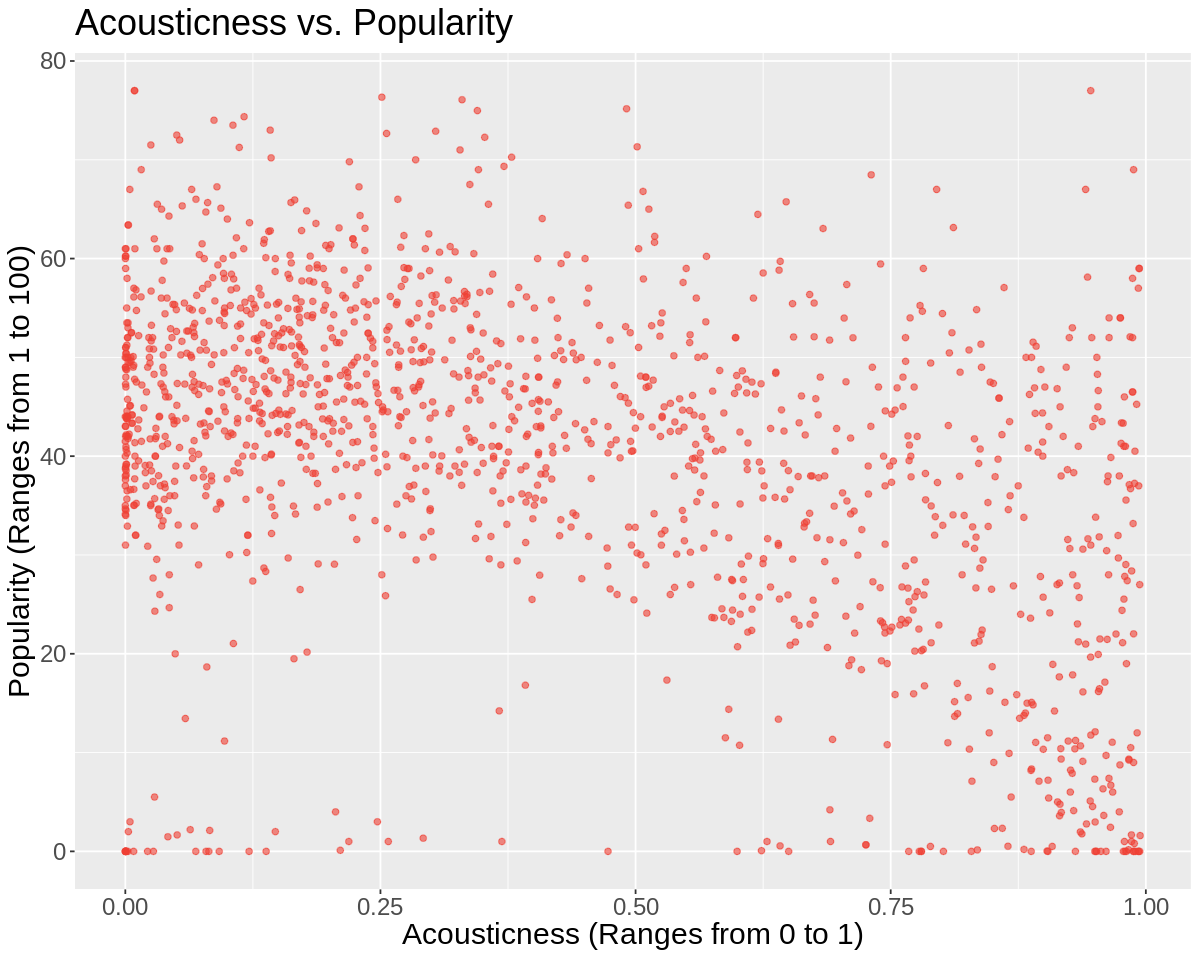

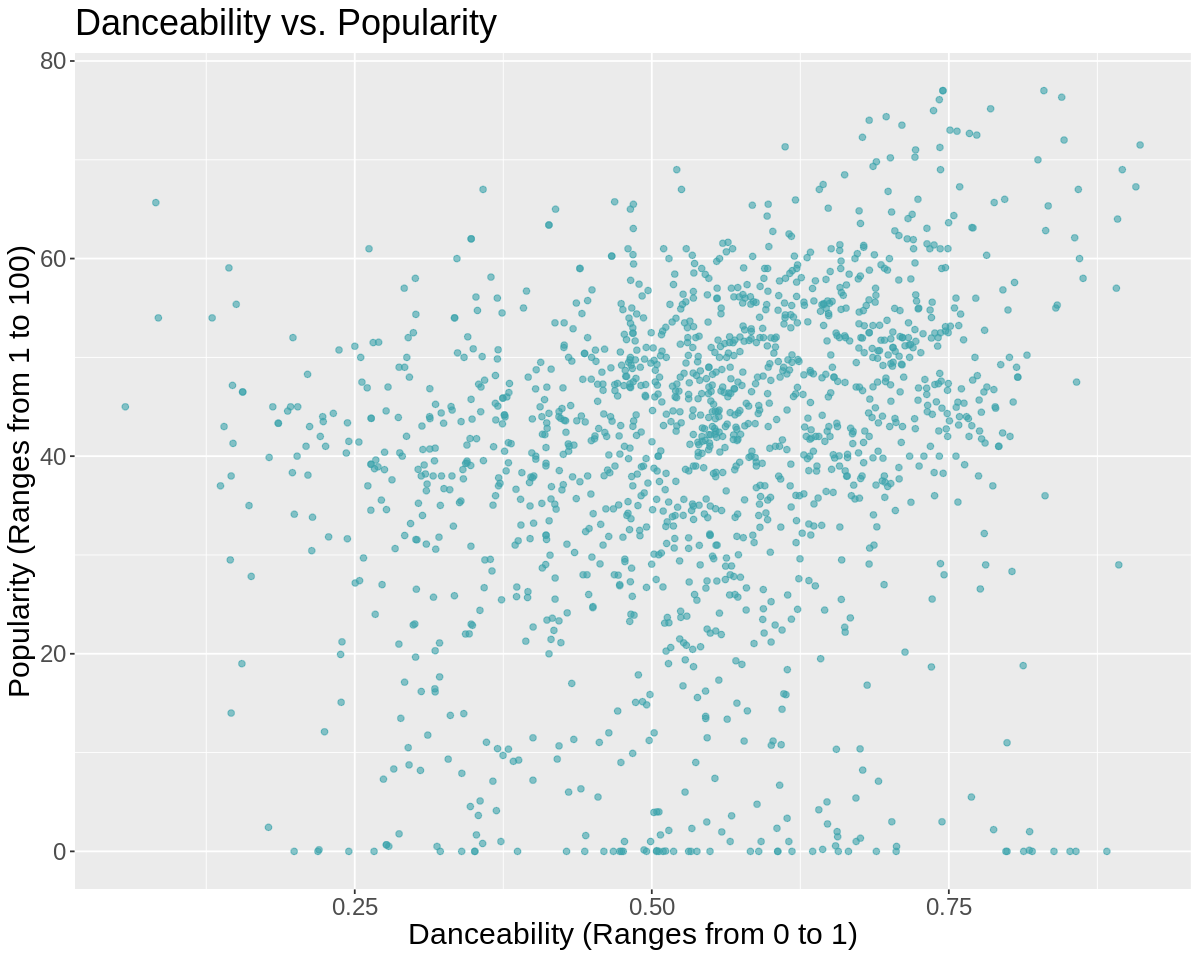

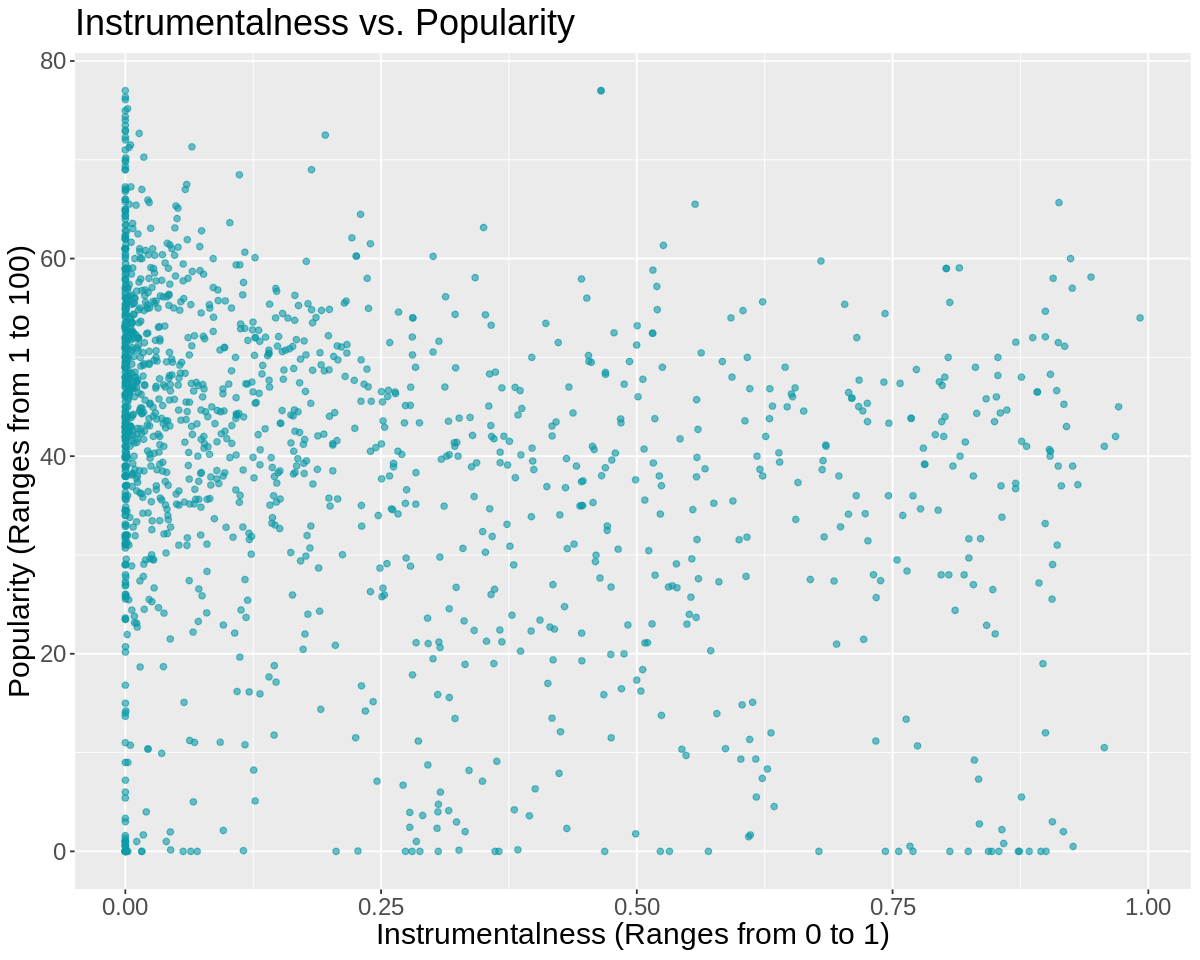

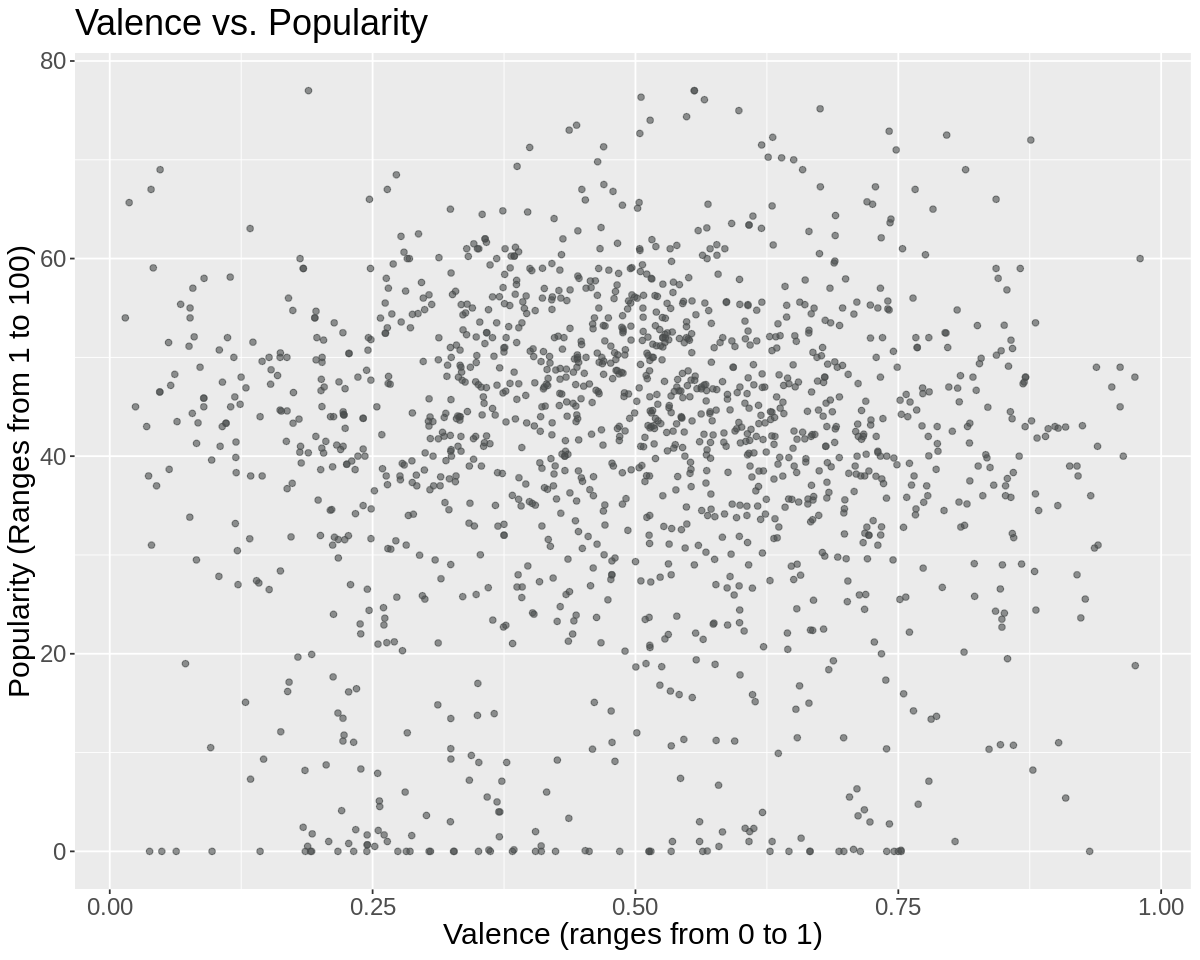

In [25]:
#Visualizations Relevant to Research

options(repr.plot.width=10, repr.plot.height=8)

duration_plot = ggplot(popularity_num2, aes(x = duration_min, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Duration (Minutes)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Duration vs. Popularity"
        ) + theme(text = element_text(size = 18))

duration_plot 

liveness_plot = ggplot(popularity_num2, aes(x = liveness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Liveness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Liveness vs. Popularity"
        ) + theme(text = element_text(size = 18))

liveness_plot

loudness_plot = ggplot(popularity_num2, aes(x = loudness, y = popularity)) +
    geom_point(alpha=0.6, colour="#56C596") +
    labs(
        x="Loudness (Ranges from -60 to 0)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Loudness vs. Popularity"
        ) + theme(text = element_text(size = 18))

loudness_plot

speechiness_plot = ggplot(popularity_num2, aes(x = speechiness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Speechiness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Speechiness vs. Popularity"
        ) + theme(text = element_text(size = 18))

speechiness_plot

tempo_plot = ggplot(popularity_num2, aes(x = tempo, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Tempo (Ranges from 50 to 150)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Tempo vs. Popularity"
        ) + theme(text = element_text(size = 18))

tempo_plot

energy_plot = ggplot(popularity_num2, aes(x = energy, y = popularity)) +
    geom_point(alpha=0.6, colour="#fe8a71") +
    labs(
        x="Energy (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Energy vs. Popularity"
        ) + theme(text = element_text(size = 18))

energy_plot

acousticness_plot = ggplot(popularity_num2, aes(x = acousticness, y = popularity)) +
    geom_point(alpha=0.6, colour="#ee4035") +
    labs(
        x="Acousticness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Acousticness vs. Popularity"
        ) + theme(text = element_text(size = 18))

acousticness_plot

danceability_plot = ggplot(popularity_num2, aes(x = danceability, y = popularity)) +
    geom_point(alpha=0.6, colour="#3da4ab") +
    labs(
        x="Danceability (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Danceability vs. Popularity"
        ) + theme(text = element_text(size = 18))

danceability_plot

instrumentalness_plot = ggplot(popularity_num2, aes(x = instrumentalness, y = popularity)) +
    geom_point(alpha=0.6, colour="#0e9aa7") +
    labs(
        x="Instrumentalness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Instrumentalness vs. Popularity"
        ) + theme(text = element_text(size = 18))

instrumentalness_plot

valence_plot = ggplot(popularity_num2, aes(x = valence, y = popularity)) +
    geom_point(alpha=0.6, colour="#4a4e4d") +
    labs(
        x="Valence (ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Valence vs. Popularity"
        ) + theme(text = element_text(size = 18))

valence_plot

### 2.5.3 GGpairs Multivariate Analysis

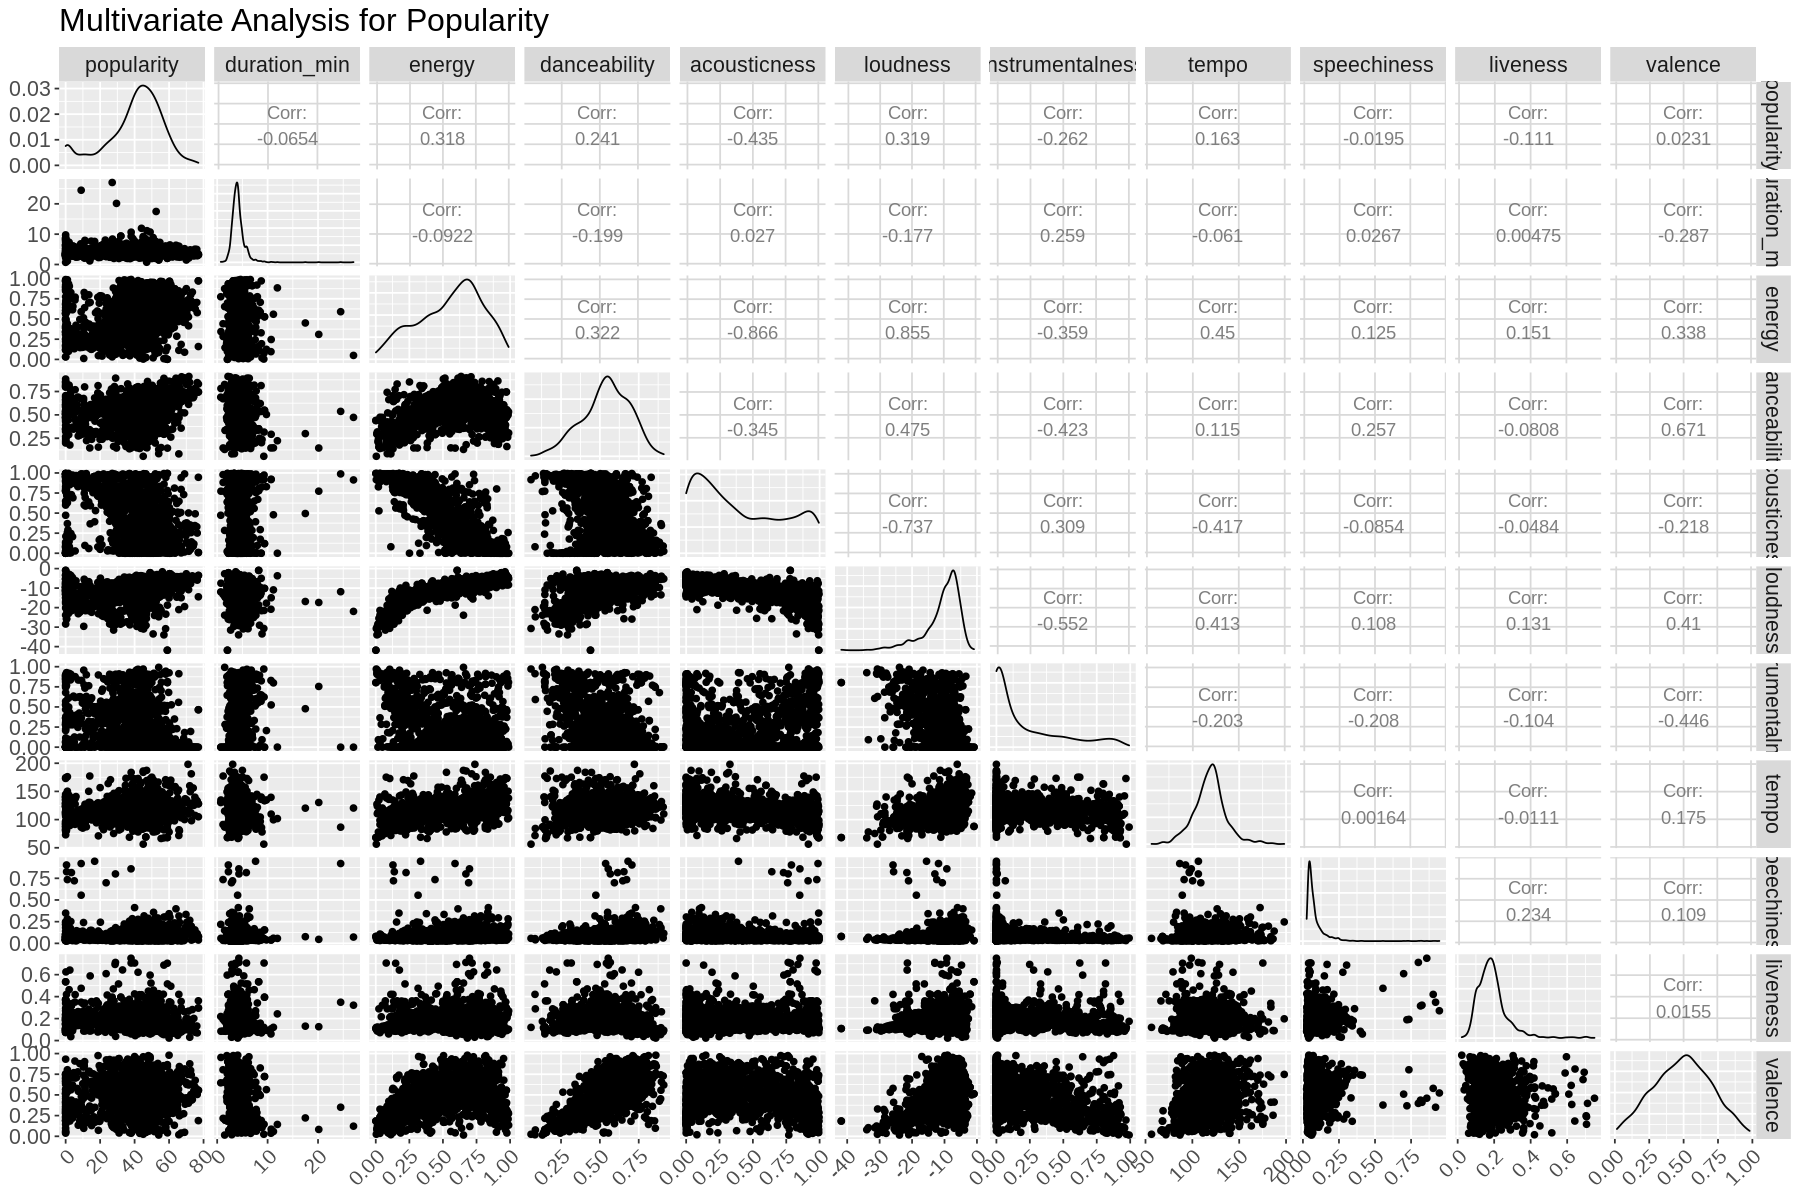

In [23]:
options(repr.plot.width = 15, repr.plot.height = 10)

#GGpairs Plot
pair_plot = popularity_num2 %>%
    select(popularity, duration_min, energy, danceability, acousticness, loudness, instrumentalness, tempo, speechiness,liveness, valence) %>%
    ggpairs() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    theme(text = element_text(size = 16)) + 
    ggtitle("Multivariate Analysis for Popularity")

pair_plot

# 3 Methods